## 使用torchvision加载MNIST手写数字数据集

In [138]:
import torchvision

train_set = torchvision.datasets.MNIST(root='../../img/mnist', train=True, download=True)
test_set = torchvision.datasets.MNIST(root='../../img/mnist', train=False, download=True)

In [ ]:
img, target = test_set[0]

In [ ]:
img

In [ ]:
target

7

In [ ]:
type(img)

PIL.Image.Image

In [ ]:
img.size

(28, 28)

## 可视化手写数字

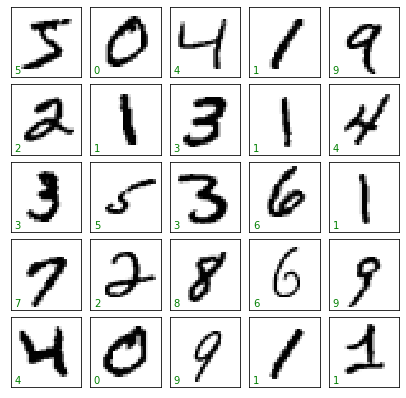

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 5, figsize=(7, 7),subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_set[i][0], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(train_set[i][1]), transform=ax.transAxes, color='green')

### 可视化手写数字1


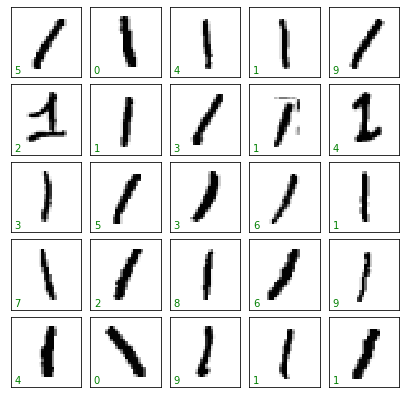

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(7, 7),subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
idx = 0
for i, ax in enumerate(axes.flat):
    while train_set[idx][1] != 1:
      idx += 1
    ax.imshow(train_set[idx][0], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(train_set[i][1]), transform=ax.transAxes, color='green')
    idx += 1

### 可视化手写数字2

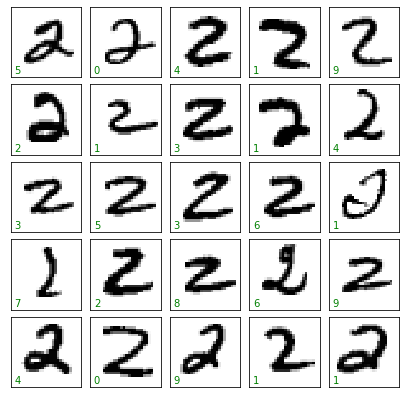

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(7, 7),subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
idx = 0
for i, ax in enumerate(axes.flat):
    while train_set[idx][1] != 2:
      idx += 1
    ax.imshow(train_set[idx][0], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(train_set[i][1]), transform=ax.transAxes, color='green')
    idx += 1

## 将train_set中的所有数字拆分出来

In [139]:
from PIL import Image, ImageOps, ImageDraw

nums = [[] for _ in range(13)]  # 0,1,2,...,12
for img, target in train_set:
  img = ImageOps.invert(img)
  nums[target].append(img)

for i in range(10):
  print(f'数字{i}的个数:', len(nums[i]))
nums[0][0]

数字0的个数: 5923
数字1的个数: 6742
数字2的个数: 5958
数字3的个数: 6131
数字4的个数: 5842
数字5的个数: 5421
数字6的个数: 5918
数字7的个数: 6265
数字8的个数: 5851
数字9的个数: 5949


## 人造画钟数据

### 人造数字10、11和12

In [140]:
import random

for i in range(5400):
  # 人造10
  # zero = random.choice(nums[0])
  # one = random.choice(nums[1])
  zero = nums[0][i]
  one = nums[1][i]
  zero = zero.resize((14, 28), Image.ANTIALIAS)
  one = one.resize((14, 28), Image.ANTIALIAS)
  ten = Image.new('RGB', (28, 28))
  ten.paste(one, box=(0, 0, 14, 28))
  ten.paste(zero, box=(14, 0, 28, 28))
  nums[10].append(ten)
  # 人造11
  # one = random.choice(nums[1])
  # one = one.resize((14, 28), Image.ANTIALIAS)
  eleven = Image.new('RGB', (28, 28))
  eleven.paste(one, box=(0, 0, 14, 28))
  eleven.paste(one, box=(14, 0, 28, 28))
  nums[11].append(eleven)
  # 人造12
  # one = random.choice(nums[1])
  # two = random.choice(nums[2])
  two = nums[2][i]
  # one = one.resize((14, 28), Image.ANTIALIAS)
  two = two.resize((14, 28), Image.ANTIALIAS)
  twelve = Image.new('RGB', (28, 28))
  twelve.paste(one, box=(0, 0, 14, 28))
  twelve.paste(two, box=(14, 0, 28, 28))
  nums[12].append(twelve)

### 可视化人造数字

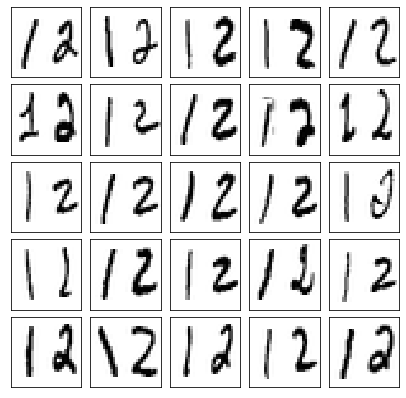

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(7, 7),subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(nums[12][i], cmap='binary', interpolation='nearest')

### 人造表盘加数字

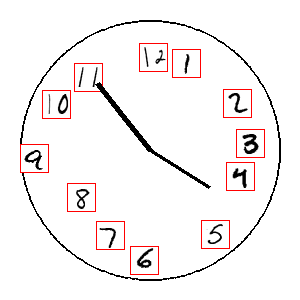

In [ ]:
import math
import random
from PIL import Image, ImageOps, ImageDraw

def gen_clock_img():
  width, height = 300, 300
  clock_img = Image.new('RGB', (width, height), (255, 255, 255))
  clock_draw = ImageDraw.Draw(clock_img)  # 创建Draw对象

  # 画钟表盘
  clock_draw.ellipse(((20, 20), (280, 280)), outline=(0, 0, 0), width=2)

  # 画数字
  pos = [(180, 50), (220, 90), (240, 130), (230, 170), (200, 210), (140, 240), (90, 220), (60, 190), (30, 140), (50, 100), (80, 60), (140, 40)]
  labels = []
  for i in range(12):
    number_img = random.choice(nums[i+1])
    jitter_x = random.randint(-10, 10)  # 横轴方向抖动
    jitter_y = random.randint(-10, 10)  # 纵轴方向抖动
    x, y = pos[i][0] + jitter_x, pos[i][1] + jitter_y
    clock_img.paste(number_img, (x, y))
    labels.append(
      {
        "transcription": str(i+1),
        "points": [[x, y], [x+28, y], [x+28, y+28], [x, y+28]]
      }
    )
    clock_draw.rectangle([(x, y), (x+28, y+28)], outline='red')  # 画出数字的bounding box

  # 画指针
  hour_hand_length = 45
  hour_end_x = random.randint(-hour_hand_length, hour_hand_length)
  hour_end_y = int(math.sqrt(hour_hand_length ** 2 - hour_end_x ** 2)) * random.choice([-1, 1])
  minute_hand_length = 70
  minute_end_x = random.randint(-minute_hand_length, minute_hand_length)
  minute_end_y = int(math.sqrt(minute_hand_length ** 2 - minute_end_x ** 2)) * random.choice([-1, 1])
  center_x = width // 2
  center_y = height // 2
  clock_draw.line((center_x, center_y, center_x + hour_end_x, center_y + hour_end_y), fill='black', width=5)
  clock_draw.line((center_x, center_y, center_x + minute_end_x, center_y + minute_end_y), fill='black', width=3)

  # 一半情况下指针加上箭头
  if random.choice([True, True]):
    hour_angle = math.atan(hour_end_y / hour_end_x)
    left_arrow_x = hour_end_x - 5 * math.cos(hour_angle - 30)
    left_arrow_y = hour_end_y + 5 * math.sin(hour_angle - 30)
    clock_draw.line((center_x + hour_end_x, center_y + hour_end_y, center_x + hour_end_x + left_arrow_x, center_y + hour_end_y + left_arrow_y), fill='black', width=5)

  return clock_img, labels

clock_img, labels = gen_clock_img()
clock_img

### 保存到Google Drive

In [141]:
# 连接Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 生成检测数据集

In [ ]:
import tqdm
mode = "test"  # [train, test]
with open(f'/content/drive/My Drive/workspace/alg_cdt/img/fake_clock_images/{mode}_label.txt', 'w') as f:
  for i in tqdm.tqdm(range(200)):
    clock_img, labels = gen_clock_img()
    clock_img.save(f"/content/drive/My Drive/workspace/alg_cdt/img/fake_clock_images/clock_{mode}_images/img_{i+1}.jpg", 'jpeg')
    f.writelines(f"clock_{mode}_images/img_{i+1}.jpg" + '\t' + str(labels).replace("'", '"') + '\n')

### 生成识别数据集

In [143]:
import tqdm
amount = {"train": 6000, "test": 600}
for mode in ["test"]:
  with open(f'/content/drive/My Drive/workspace/alg_cdt/img/fake_clock_images/rec/rec_gt_{mode}.txt', 'w') as f:
    for i in tqdm.tqdm(range(amount[mode])):
      num = random.randint(1, 12)
      num_img = random.choice(nums[num])
      num_img.save(f"/content/drive/My Drive/workspace/alg_cdt/img/fake_clock_images/rec/{mode}/num_img_{i+1}.jpg", 'jpeg')
      f.writelines(f'num_img_{i+1}.jpg\t{str(num)}\n')

100%|██████████| 600/600 [00:05<00:00, 100.73it/s]
